In [1]:
from absenteeism_module import *

In [4]:
pd.read_csv('Absenteeism_new_data.csv').head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,22,27,01/06/2018,179,26,30,237.656,19,3,0,0
1,10,7,04/06/2018,361,52,28,237.656,27,1,1,4
2,14,23,06/06/2018,155,12,34,237.656,25,1,2,0
3,17,25,08/06/2018,179,22,40,237.656,22,2,2,0
4,14,10,08/06/2018,155,12,34,237.656,25,1,2,0


In [6]:
model = absenteeism_model('model', 'scaler') #create instance of the class using objects saved with pickle

In [7]:
model.load_and_clean_data('Absenteeism_new_data.csv')

In [15]:
df_new_obs = model.predicted_outputs()

In [51]:
df_new_obs['Reason_2']=df_new_obs['Reason_2'].astype(int)

In [52]:
df_new_obs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet,Probability,Prediction
0,0,0,0,1,6,179,30,19,1,0,0,0.122799,0
1,1,0,0,0,6,361,28,27,0,1,4,0.873392,1
2,0,0,0,1,6,155,34,25,0,2,0,0.268305,0
3,0,0,0,1,6,179,40,22,1,2,0,0.196385,0
4,1,0,0,0,6,155,34,25,0,2,0,0.723502,1
5,1,0,0,0,6,225,28,24,0,1,2,0.716891,1
6,1,0,0,0,6,118,46,25,0,2,0,0.570524,1
7,0,0,0,1,6,179,30,19,1,0,0,0.122799,0
8,0,0,0,1,6,118,37,28,0,0,0,0.134118,0
9,1,0,0,0,6,118,37,28,0,0,0,0.525007,1


In [9]:
import pymysql

### Create connection and cursor

In [13]:
conn = pymysql.connect(database = 'predicted_outputs', user = 'root', password = 'password' )

In [14]:
cursor = conn.cursor()

In [61]:
query = 'SELECT * FROM predicted_outputs;'

In [54]:
cursor.execute(query) #test that everything is ok

0

#### send data

In [62]:
insert_query = 'INSERT INTO predicted_outputs VALUES '

In [63]:
for i in range(df_new_obs.shape[0]):
    insert_query += '('
    
    for j in range(df_new_obs.shape[1]):
        insert_query += str(df_new_obs[df_new_obs.columns.values[j]][i]) + ', '
    
    insert_query = insert_query[:-2] + '), '

In [64]:
insert_query

'INSERT INTO predicted_outputs VALUES (0, 0, 0, 1, 6, 179, 30, 19, 1, 0, 0, 0.12279926243494323, 0), (1, 0, 0, 0, 6, 361, 28, 27, 0, 1, 4, 0.8733923470447209, 1), (0, 0, 0, 1, 6, 155, 34, 25, 0, 2, 0, 0.2683049546034322, 0), (0, 0, 0, 1, 6, 179, 40, 22, 1, 2, 0, 0.1963853143922252, 0), (1, 0, 0, 0, 6, 155, 34, 25, 0, 2, 0, 0.7235017225544896, 1), (1, 0, 0, 0, 6, 225, 28, 24, 0, 1, 2, 0.7168905020985188, 1), (1, 0, 0, 0, 6, 118, 46, 25, 0, 2, 0, 0.5705238370679658, 1), (0, 0, 0, 1, 6, 179, 30, 19, 1, 0, 0, 0.12279926243494323, 0), (0, 0, 0, 1, 6, 118, 37, 28, 0, 0, 0, 0.13411805408968352, 0), (1, 0, 0, 0, 6, 118, 37, 28, 0, 0, 0, 0.5250065611752316, 1), (0, 0, 0, 1, 6, 378, 36, 21, 0, 2, 4, 0.4549980207286245, 0), (0, 0, 1, 0, 6, 118, 50, 31, 0, 1, 0, 0.6447416367376194, 1), (0, 0, 1, 0, 6, 233, 31, 21, 1, 1, 8, 0.35110766120784753, 0), (0, 0, 0, 1, 6, 179, 30, 19, 1, 0, 0, 0.12279926243494323, 0), (0, 0, 0, 0, 6, 235, 48, 33, 0, 1, 5, 0.09653346354354148, 0), (0, 0, 0, 0, 6, 268, 33, 2

In [65]:
insert_query = insert_query[:-2] + ';'#replace last comma space with semicolon to finish query

In [66]:
insert_query

'INSERT INTO predicted_outputs VALUES (0, 0, 0, 1, 6, 179, 30, 19, 1, 0, 0, 0.12279926243494323, 0), (1, 0, 0, 0, 6, 361, 28, 27, 0, 1, 4, 0.8733923470447209, 1), (0, 0, 0, 1, 6, 155, 34, 25, 0, 2, 0, 0.2683049546034322, 0), (0, 0, 0, 1, 6, 179, 40, 22, 1, 2, 0, 0.1963853143922252, 0), (1, 0, 0, 0, 6, 155, 34, 25, 0, 2, 0, 0.7235017225544896, 1), (1, 0, 0, 0, 6, 225, 28, 24, 0, 1, 2, 0.7168905020985188, 1), (1, 0, 0, 0, 6, 118, 46, 25, 0, 2, 0, 0.5705238370679658, 1), (0, 0, 0, 1, 6, 179, 30, 19, 1, 0, 0, 0.12279926243494323, 0), (0, 0, 0, 1, 6, 118, 37, 28, 0, 0, 0, 0.13411805408968352, 0), (1, 0, 0, 0, 6, 118, 37, 28, 0, 0, 0, 0.5250065611752316, 1), (0, 0, 0, 1, 6, 378, 36, 21, 0, 2, 4, 0.4549980207286245, 0), (0, 0, 1, 0, 6, 118, 50, 31, 0, 1, 0, 0.6447416367376194, 1), (0, 0, 1, 0, 6, 233, 31, 21, 1, 1, 8, 0.35110766120784753, 0), (0, 0, 0, 1, 6, 179, 30, 19, 1, 0, 0, 0.12279926243494323, 0), (0, 0, 0, 0, 6, 235, 48, 33, 0, 1, 5, 0.09653346354354148, 0), (0, 0, 0, 0, 6, 268, 33, 2

In [67]:
cursor.execute(insert_query)

40

In [68]:
conn.commit() #commit the change to database

In [69]:
conn.close() #close the connection

#### Plot age vs probability

In [70]:
df_new_obs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet,Probability,Prediction
0,0,0,0,1,6,179,30,19,1,0,0,0.122799,0
1,1,0,0,0,6,361,28,27,0,1,4,0.873392,1
2,0,0,0,1,6,155,34,25,0,2,0,0.268305,0
3,0,0,0,1,6,179,40,22,1,2,0,0.196385,0
4,1,0,0,0,6,155,34,25,0,2,0,0.723502,1


In [72]:
import matplotlib.pyplot as plt

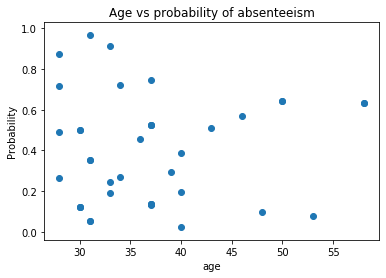

In [78]:
x = df_new_obs['Age']
y = df_new_obs['Probability']

plt.scatter(x,y)
plt.title('Age vs probability of absenteeism')
plt.xlabel('age')
plt.ylabel('Probability')
plt.show()